# **Spotify Exploratory Data Analysis**
---



In [ ]:
# importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt~
import plotly.express as px
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(rc={"figure.figsize": (10,4)},
              style="ticks")
spotify_df = pd.read_csv("C:\Project DXO\spotify data analysis\Spotify_Refined_Explicity_classifed.csv",encoding='latin-1') 

***The refinded spotify dataset contains the correct classified explicit tracks. You can find the discussion thread here: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/discussion/513790**

In [9]:
spotify_df.head(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Explicit Classified
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,1


## **Transforming dataset for EDA**

**Dropping Features having Null values over 45%**

In [10]:
fig = px.imshow(spotify_df.isna(),aspect="auto",color_continuous_scale="purples")
fig.update_layout(coloraxis_showscale=False,xaxis_title="Features",title="Missing values Heatmap")
fig.show()

In [11]:
# Null values % in each column
for col in spotify_df.columns:
    null_values = spotify_df[col].isnull().sum()
    print(f"{col=} : {int(null_values/4600 * 100)} % ")

col='Track' : 0 % 
col='Album Name' : 0 % 
col='Artist' : 0 % 
col='Release Date' : 0 % 
col='ISRC' : 0 % 
col='All Time Rank' : 0 % 
col='Track Score' : 0 % 
col='Spotify Streams' : 2 % 
col='Spotify Playlist Count' : 1 % 
col='Spotify Playlist Reach' : 1 % 
col='Spotify Popularity' : 17 % 
col='YouTube Views' : 6 % 
col='YouTube Likes' : 6 % 
col='TikTok Posts' : 25 % 
col='TikTok Likes' : 21 % 
col='TikTok Views' : 21 % 
col='YouTube Playlist Reach' : 21 % 
col='Apple Music Playlist Count' : 12 % 
col='AirPlay Spins' : 10 % 
col='SiriusXM Spins' : 46 % 
col='Deezer Playlist Count' : 20 % 
col='Deezer Playlist Reach' : 20 % 
col='Amazon Playlist Count' : 22 % 
col='Pandora Streams' : 24 % 
col='Pandora Track Stations' : 27 % 
col='Soundcloud Streams' : 72 % 
col='Shazam Counts' : 12 % 
col='TIDAL Popularity' : 100 % 
col='Explicit Track' : 0 % 
col='Explicit Classified' : 0 % 


In [12]:
# dropping TIDAL Popularity, Soundcloud streams & SiriusXM Spins from data
spotify_df.drop(["TIDAL Popularity","Soundcloud Streams","SiriusXM Spins"],axis=1,inplace=True)

**Replacing Explict Classified Col with Explicit Track**

In [13]:
# Replacing the Explicity Track from Explicit Classified
spotify_df.drop(["Explicit Track"],axis=1,inplace=True)
spotify_df.rename(columns={"Explicit Classified":"Explicit Track"},inplace=True)

**Transforming data types for the required columns**

In [14]:
obj_columns = spotify_df.select_dtypes(include="object").columns[5:]
float_columns = spotify_df.select_dtypes(include=float).columns[1:]
print(f"{obj_columns=}")
print(f"{float_columns=}")


for col in float_columns:
    try:
        spotify_df[col] = spotify_df[col].astype(float)
    except:
        spotify_df[col] = spotify_df[col].astype('float64')



for col in obj_columns:
    try:
        spotify_df[col] = spotify_df[col].str.replace(',','').astype(float)
    except:
        spotify_df[col] = spotify_df[col].str.replace(',','').astype('float64')

obj_columns=Index(['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
       'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'AirPlay Spins', 'Deezer Playlist Reach',
       'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts'],
      dtype='object')
float_columns=Index(['Spotify Popularity', 'Apple Music Playlist Count',
       'Deezer Playlist Count', 'Amazon Playlist Count'],
      dtype='object')


In [15]:
# all numerical columns converted to float/int
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

**Extracting Year Column from the Release Date of Tracks**

In [16]:
spotify_df["Year"] = pd.to_datetime(spotify_df["Release Date"]).dt.year

**Dropping Duplicates**

In [17]:
# only 1 duplicate found
spotify_df.drop_duplicates(inplace=True)

## **Exploratory Data Analysis**
---

### **Univariate Analysis**

#### **Distribution of Spotify Popularity**

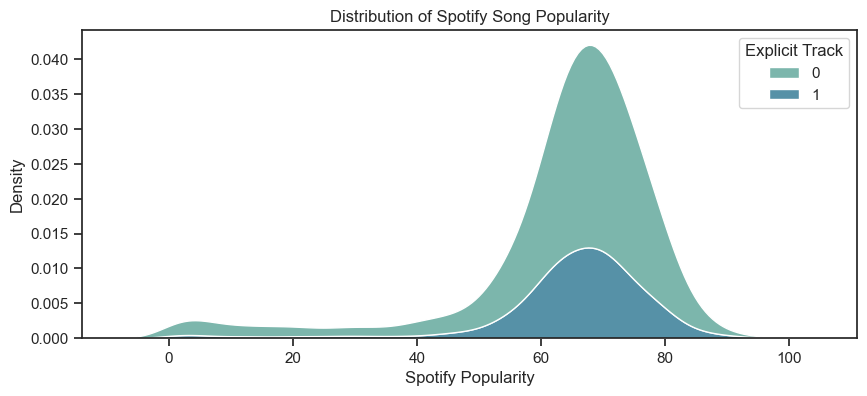

In [18]:

fig = sns.kdeplot(data=spotify_df,
             x="Spotify Popularity",
             fill=True,
             hue="Explicit Track",
             multiple="stack",
             palette='crest')

plt.title("Distribution of Spotify Song Popularity")
plt.show(fig)

> **Out of 100, most of the spotify tracks gain popularity between 60-80.**

#### **Distribution of Track Score**

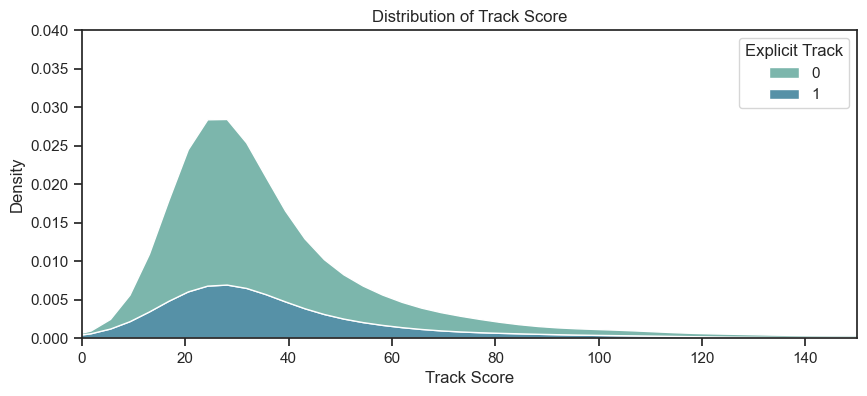

In [19]:
fig = sns.kdeplot(data=spotify_df,
             x="Track Score",
             fill=True,
             hue="Explicit Track",
             multiple="stack",
             palette='crest',
             )

plt.title("Distribution of Track Score")
plt.xlim((0,150))
plt.ylim((0,0.04))
plt.show(fig)

> **The avg. Track Score lies between 20-30, which is illustrating that a decent performing track would achieve track score within this range.**

#### **Artists releasing the most tracks on spotify**

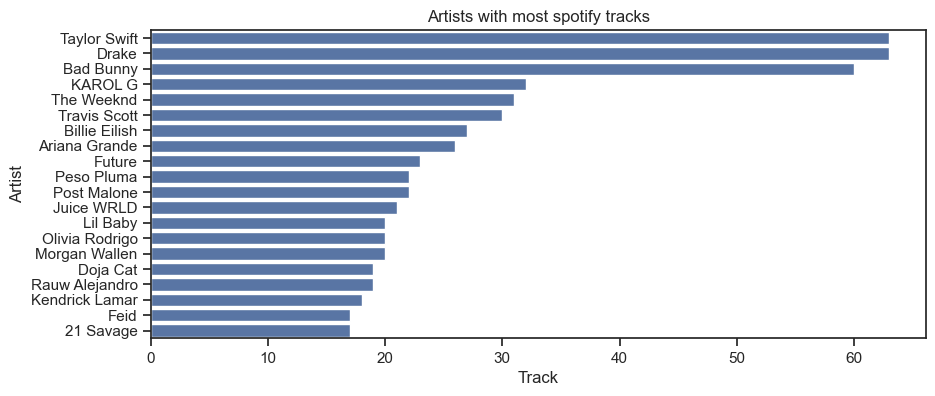

In [20]:
freq_Artists = spotify_df.groupby("Artist")\
                         .count()["Track"]\
                         .sort_values(ascending=False)[:20]
fig = sns.barplot(data=freq_Artists,orient="h")
plt.title("Artists with most spotify tracks")
plt.show(fig)

> **Taylor Swift and Drake released the most tracks with the total of 60 each.**

#### **Year-wise Track Score Performance**

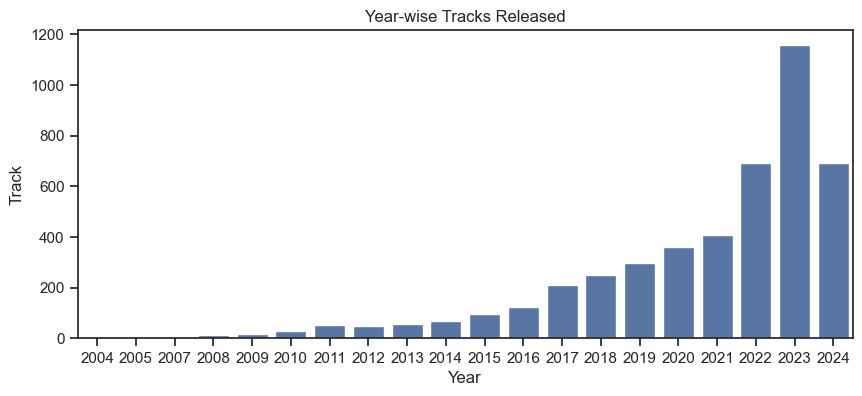

In [21]:
year_wise_tracks = spotify_df.groupby("Year").count()["Track"].sort_values(ascending=False)[:20]
fig = sns.barplot(data=year_wise_tracks,orient="v")
plt.title("Year-wise Tracks Released")
plt.show(fig)

> **This shows an upward trend. As the year passes, we get to see the frequency of tracks releasing.**

**NOTE: The following dataset contains a variety of Artists. Hence, better to analyze for the Top 7 All Time Ranked Artists on how they outperformed the rest.**

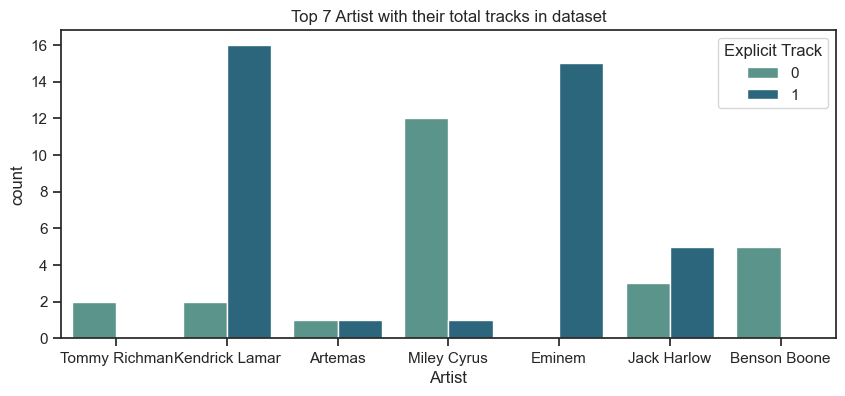

In [22]:
top_7_artists = spotify_df.head(7)["Artist"].tolist()
top_7_artists_df = spotify_df.query(f"Artist in {top_7_artists}")
top_7_artists_df.groupby("Artist").count()["Track"].to_frame()

fig = sns.countplot(data=top_7_artists_df,
                    x="Artist",
                    palette="crest",
                    hue="Explicit Track")
plt.title("Top 7 Artist with their total tracks in dataset")
plt.show(fig)

> **Very less Explicit Tracks released in Spotify, although having huge impact. Eminem and Kendrick Lamar with songs related to their beefs in the industry high gain such popularity and thus released more.**

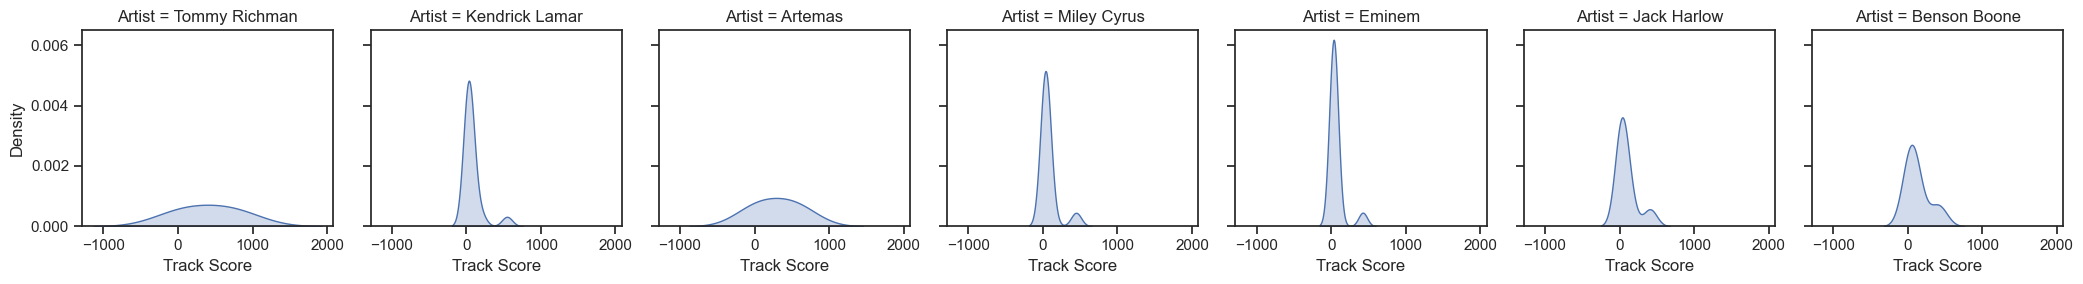

In [23]:
g = sns.FacetGrid(data=top_7_artists_df,col='Artist',despine=False)
g.map_dataframe(func=sns.kdeplot,x="Track Score",fill="True")
plt.show()

### **Bivariate Analysis**

#### **Relationship b/w Track Score and Spotify Popularity**

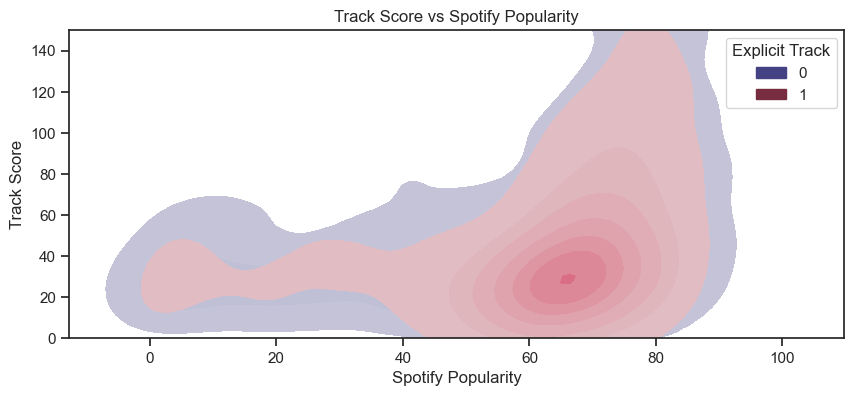

In [24]:
sns.kdeplot(spotify_df,x='Spotify Popularity',y='Track Score',fill=True,hue="Explicit Track",palette="icefire")
plt.ylim((0,150))
plt.title("Track Score vs Spotify Popularity")
plt.show()


> **It tells us that there is a huge variation in track scores and Spotify popularity.**

> **Two concentrated peaks are lying at (0-20) and (60-80). Partially, it could be good source in classifying worst and best tracks streamed on spotify.**

#### **Relationship b/w Youtube Views vs Youtube Likes**

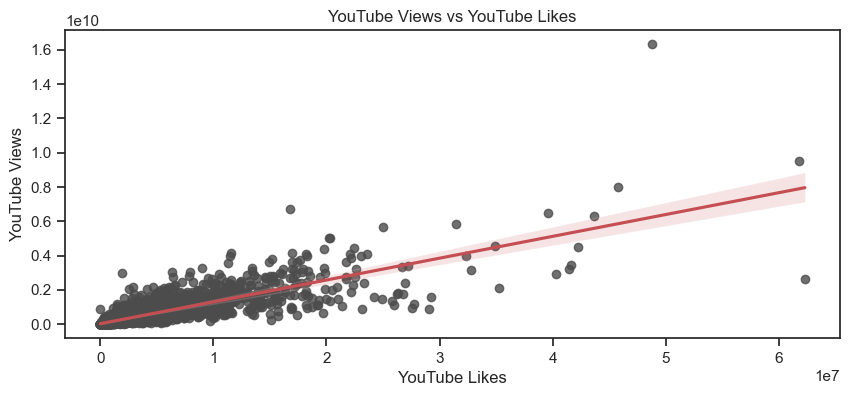

In [25]:
sns.regplot(spotify_df,x='YouTube Likes',y='YouTube Views',color=".3", line_kws=dict(color="r"))
plt.title('YouTube Views vs YouTube Likes')
plt.show()

> **A rough linear pattern we can obtain from this. But, We can't conclude that having more views tends to have more likes. Avg. songs may face shortage in likes. Also, we can see that the highest viewed Youtube song didn't get the maximum likes.**

#### **Relationship b/w TikTok Views vs TiktTok Likes**

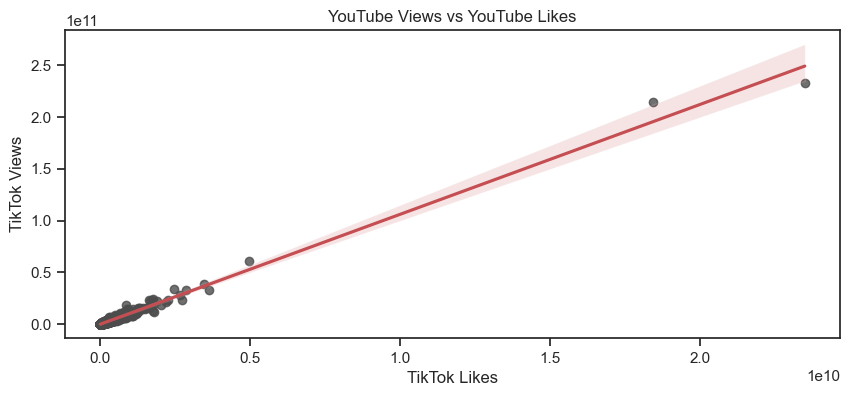

In [26]:
sns.regplot(spotify_df,x='TikTok Likes',y='TikTok Views',color=".3", line_kws=dict(color="r"))
plt.title('YouTube Views vs YouTube Likes')
plt.show()

> 21% of the data for TikTok is missing as found during Data Transformation. Mostly Songs are used for Trends and Short Humoured videos. A Linear relationship seems justified here since the most liked videos tend to get more views and the vice-versa is also True.

#### **How Dates have an impact on Song Popularity?**

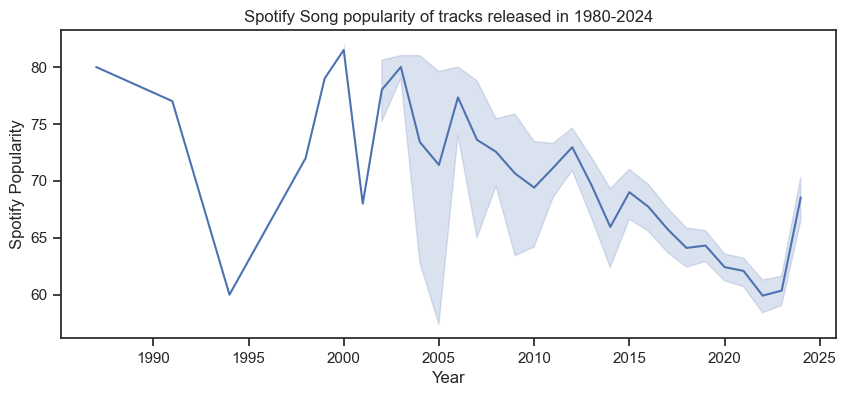

In [27]:
fig = sns.lineplot(data=spotify_df,
                   x="Year",y="Spotify Popularity",
                   markers=True)
plt.title("Spotify Song popularity of tracks released in 1980-2024")
plt.show()

> **There seen a huge decline from 1990 to 1995, and it fluctuated a lot further. The reason could be that of success of different genres. People must be have moved on to different music tastes since 1995.**

#### **How Dates have an impact on Track Score?**

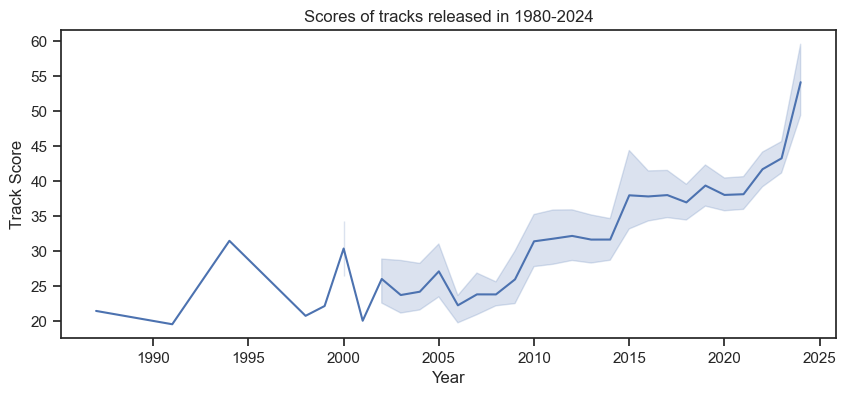

In [ ]:
fig = sns.lineplot(data=spotify_df,
                   x="Year",y="Track Score")
plt.title("Scores of tracks released in 1980-2024")
plt.show()

> **The fluctuations in Track Scores might be influenced by various factors, such as the popularity of different music genres, the emergence of new artists, or changes in the music industry.**

#### **PairGrid**

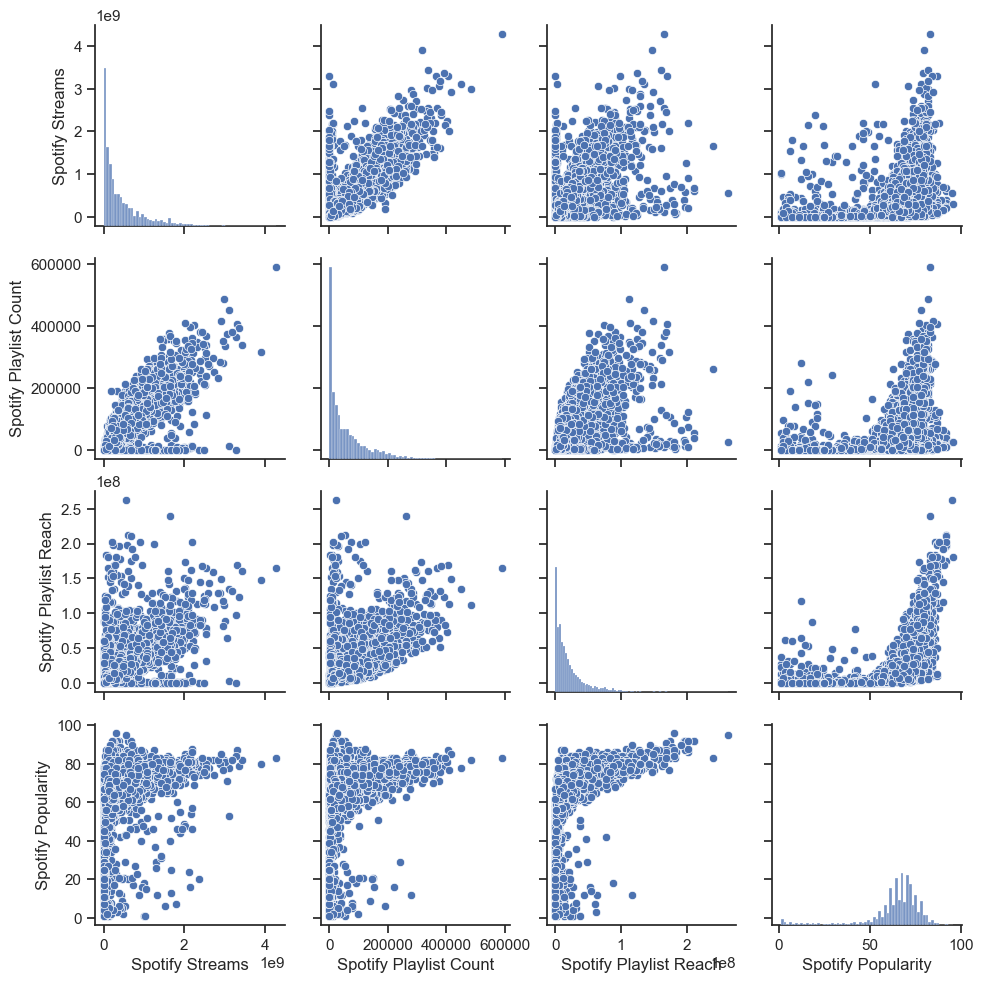

In [28]:
spotify_lst = list(filter(lambda x: "Spotify" in x,spotify_df.columns.tolist()))
fig = sns.pairplot(data=spotify_df[spotify_lst])
plt.show(fig)

### **Multivariate Analysis**

#### **Comparison of playlist counts over different platforms**

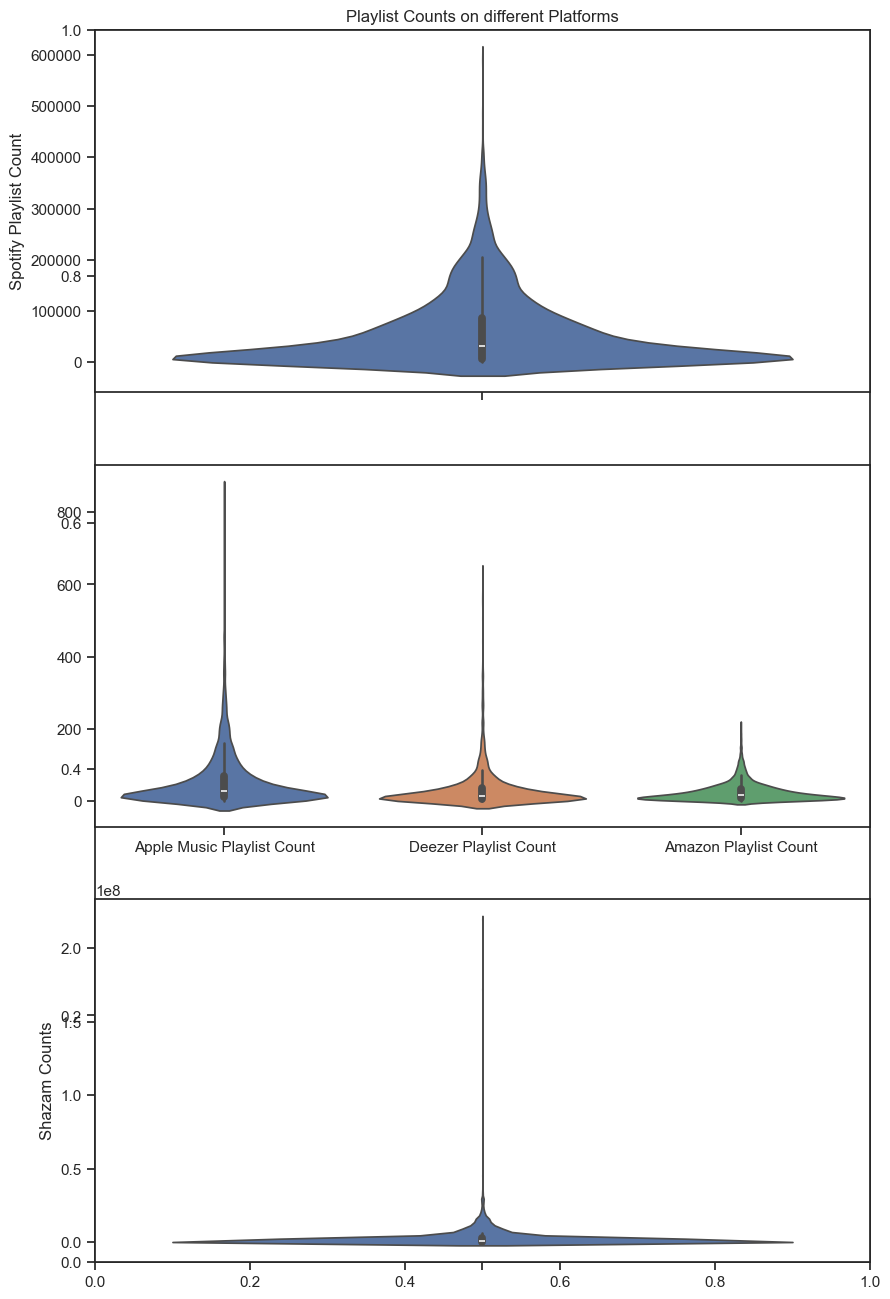

In [29]:
playlists_counts = list(filter(lambda x : "Count" in x, spotify_df.columns.tolist()))  

plt.figure(figsize=(10,16))

plt.title("Playlist Counts on different Platforms")

plt.subplot(3,1,1)
sns.violinplot(data=spotify_df[playlists_counts[0]])
plt.subplot(3,1,2)
sns.violinplot(data=spotify_df[playlists_counts[1:-1]])
plt.subplot(3,1,3)
sns.violinplot(data=spotify_df[playlists_counts[-1]])

plt.show()

> **Due to lack of data from other platforms, finding insights from this would be meaningless.**

#### **Correlation Matrix**

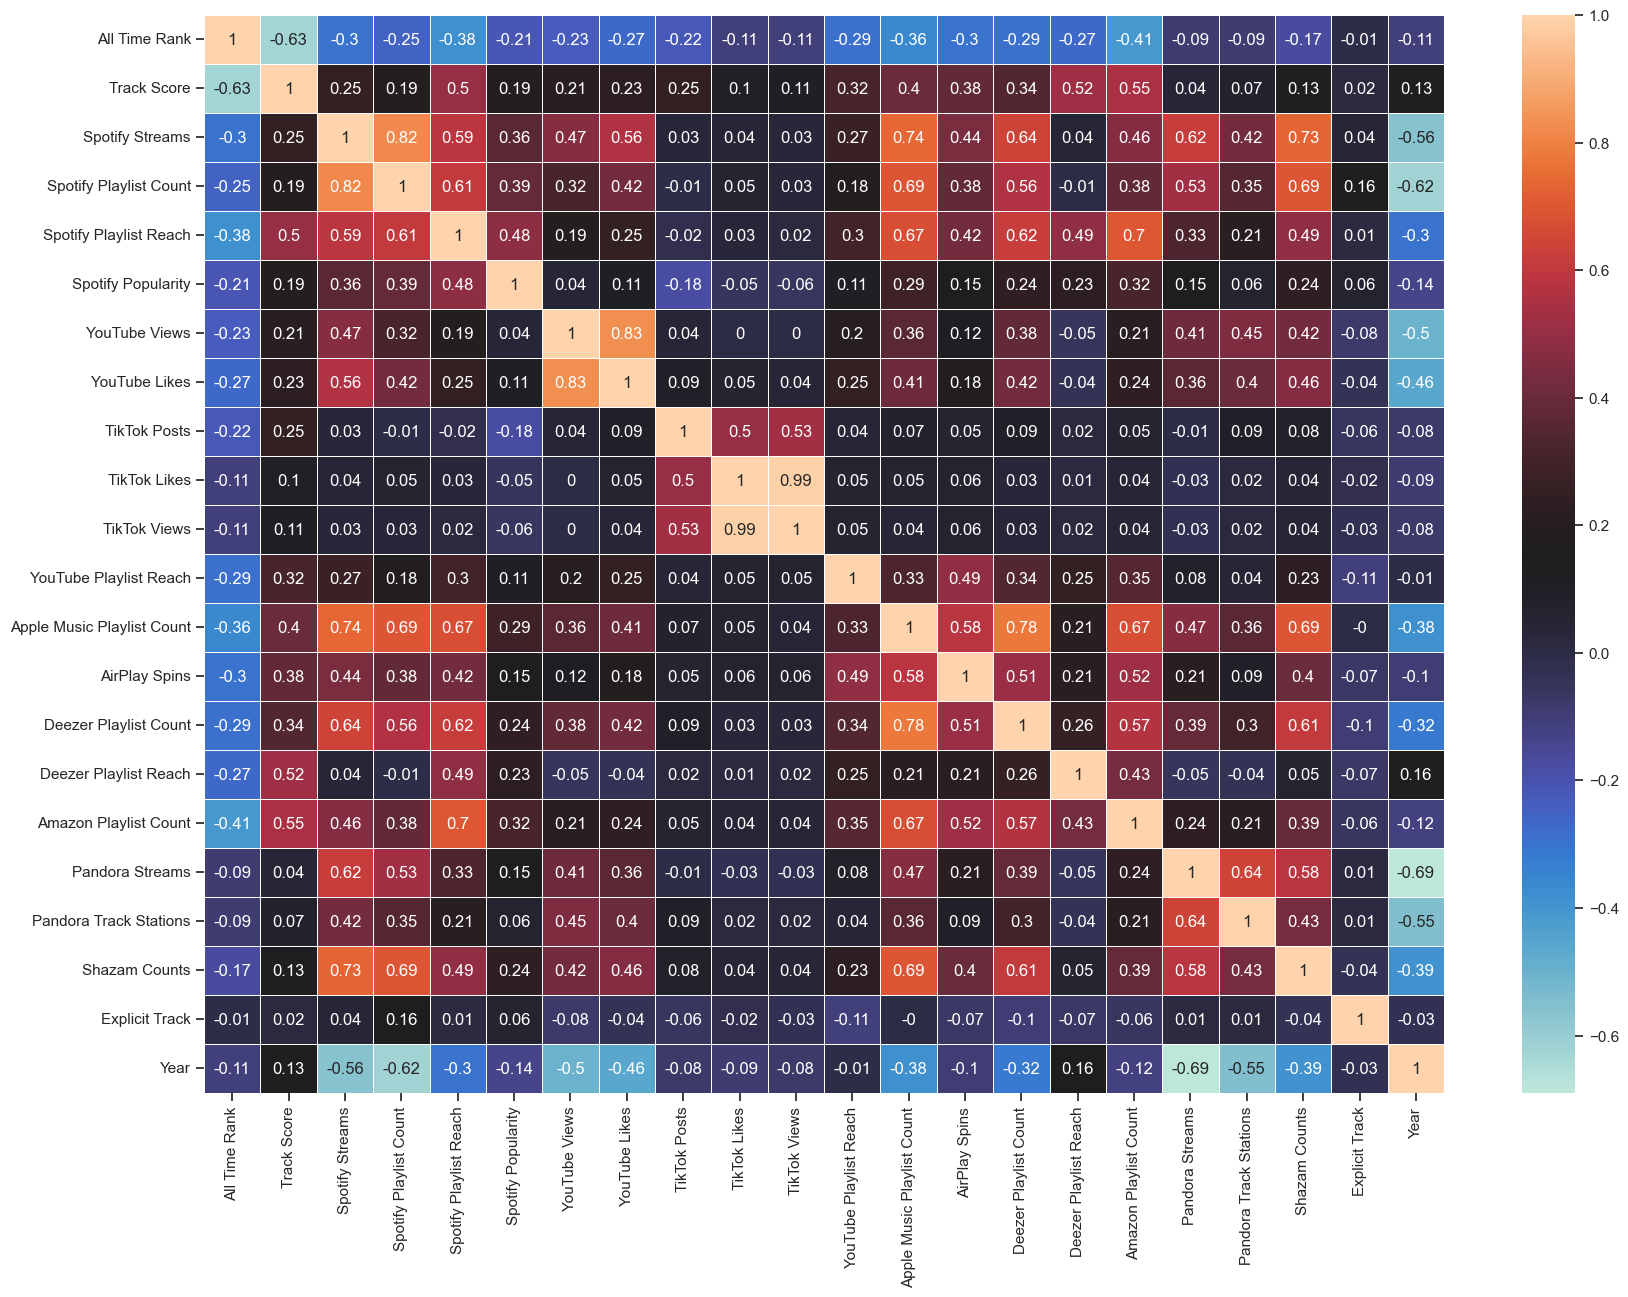

In [30]:
plt.figure(figsize=(20,14))
sns.heatmap(data=spotify_df.select_dtypes(exclude='object').corr().round(decimals=2),
            annot=True,
            cmap='icefire',
            linewidths=.5,
            linecolor='white')
plt.show()

In [31]:
threshold = 0.70

correlation = spotify_df.corr().stack().reset_index()
correlation.columns = ['feature1','feature2','corr']
highest_corr = correlation[(correlation['corr'] > 0.70) & (correlation['feature1'] != correlation['feature2'])]

highest_corr.sort_values('corr',ascending=False).drop_duplicates('corr')

,feature1,feature2,corr
208,TikTok Likes,TikTok Views,0.992530
139,YouTube Views,YouTube Likes,0.833917
47,Spotify Streams,Spotify Playlist Count,0.815082
278,Apple Music Playlist Count,Deezer Playlist Count,0.775697
56,Spotify Streams,Apple Music Playlist Count,0.744928
63,Spotify Streams,Shazam Counts,0.734656
